In [23]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [24]:
# define state
class BMIState(TypedDict):
    height: float  # in meters
    weight: float  # in kilograms
    bmi: float     # Body Mass Index
    category: str  # BMI Category

In [25]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight']
    height = state['height']
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi, 2)
    return state    

In [26]:
def label_bmi(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        state['category'] = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        state['category'] = 'Normal weight'
    elif 25 <= bmi < 29.9:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obesity'
    return state

In [27]:
# define the graph
graph = StateGraph(BMIState)

# add nodes to your graph
graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("label_bmi", label_bmi)

# add edges to your graph
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", "label_bmi")
graph.add_edge("label_bmi", END)

# compile the graph
workflow = graph.compile()

In [28]:
# execute the workflow
initial_state = {'height': 1.73, 'weight': 80}
final_state = workflow.invoke(initial_state)
print(final_state)  # Output: {'height': 1.73, 'weight': 80, 'bmi': 26.74}

{'height': 1.73, 'weight': 80, 'bmi': 26.73, 'category': 'Overweight'}


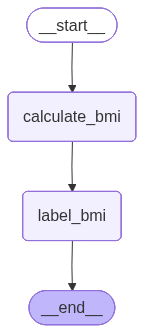

In [29]:
# Visualize the graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())